<a href="https://colab.research.google.com/github/S3IFK/Practise/blob/main/PCA_Implementation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd

In [27]:
np.random.seed(23)

In [28]:
mu_v1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class_sample = np.random.multivariate_normal(mu_v1, cov_mat1,20)

In [29]:
df = pd.DataFrame(class_sample,columns=['feature', 'feature2', 'feature3'])
df['target'] =1

In [30]:
mu_v2 = np.array([1,1,1])

In [31]:
cov_m2= np.array([[1,0,0],[0,1,0],[0,0,1]])

In [32]:
class2_sample = np.random.multivariate_normal(mu_v2,cov_m2, 20)

In [33]:
df1 = pd.DataFrame(class2_sample,columns=['feature1', 'feature2','feature3'])

In [34]:
df1['target'] = 0

In [35]:
df = df.append(df1,ignore_index=True)

In [36]:
df = df.sample(40)

In [37]:
df.head()

,feature,feature2,feature3,target,feature1
2,-0.367548,-1.137460,-1.322148,1,NaN
34,NaN,-0.598109,1.226512,0,0.177061
14,0.420623,0.411620,-0.071324,1,NaN
11,1.968435,-0.547788,-0.679418,1,NaN
12,-2.506230,0.146960,0.606195,1,NaN


In [38]:
import plotly.express as pt

In [39]:
#y_train_trf =y.train.astype(str)
fig = pt.scatter_3d(df, x=df['feature1'], y=df['feature2'], z=df['feature3'], color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12, line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))

fig.show()


In [40]:
# Applying Standard Scaler

from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [49]:
df.iloc[:,0:3] = scaler.fit_transform(df[:,0:3])

TypeError: ignored

In [50]:
covariance_matrix = np.cov([df.iloc[:,1],df.iloc[:,2]])
print("Covariance Matrix:\n", covariance_matrix)

Covariance Matrix:
 [[1.12566959 0.23643388]
 [0.23643388 1.327287  ]]


In [51]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [52]:
eigen_values

array([0.96945033, 1.48350626])

In [53]:
eigen_vectors

array([[-0.8343288 , -0.55126713],
       [ 0.55126713, -0.8343288 ]])

In [54]:
%pylab inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

Populating the interactive namespace from numpy and matplotlib


IndexError: ignored

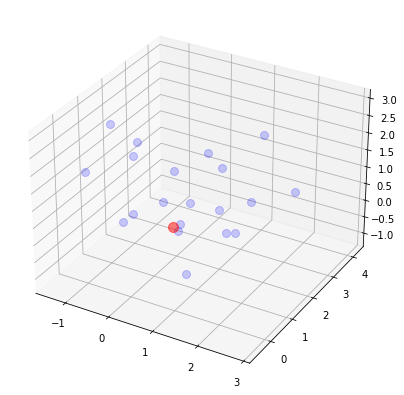

In [61]:

class Arrow3D(FancyArrowPatch):
  def __init__(self,xs,ys,zs, *args, **kwargs):
      FancyArrowPatch.__init__(self,(0,0),(0,0),*args, **kwargs)
      self._verts3d = xs,ys, zs

  def draw(self, renderer):
    xs3d, ys3d, zs3d = self._verts3d
    xs,ys,zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer, M)
    self.set_positions((xs[0], ys[1], zs[1]))
    FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue',alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red',alpha=0.5)
for v in eigen_vectors.T:
    a = Arrow3D([df['feature1'].mean(),v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(),v[2]], mutation_scale=20, lw=3,arrowstyle='->')
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [62]:
pc = eigen_vectors[0:2]

In [63]:
pc

array([[-0.8343288 , -0.55126713],
       [ 0.55126713, -0.8343288 ]])

In [64]:
transform_df = np.dot(df.iloc[:,0:3],pc.T)

ValueError: ignored

In [65]:
new_df = pd.DataFrame(transform_df, columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

NameError: ignored

In [66]:
new_df['target'] = new_df['target'].astype('str')
fig = pt.scatter(x=new_df['PC1'], y=new_df['PC2'], color=new_df['target'],color_discrete_sequence==pt.colors.qualitative.G10)


fig.update_traces(marker=dict(size=12, line=dict(width=2,color='DarkStyleGrey')),selector=dict(mode='markers'))

fig.show()


SyntaxError: ignored